In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('BTC-Daily.csv')
print(df.shape)
df.drop_duplicates()

(2651, 9)


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [4]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [5]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].min()) + ' to ' + str(df['date'].max())
print(date_range)

2014-11-28 00:00:00 to 2022-03-01 00:00:00


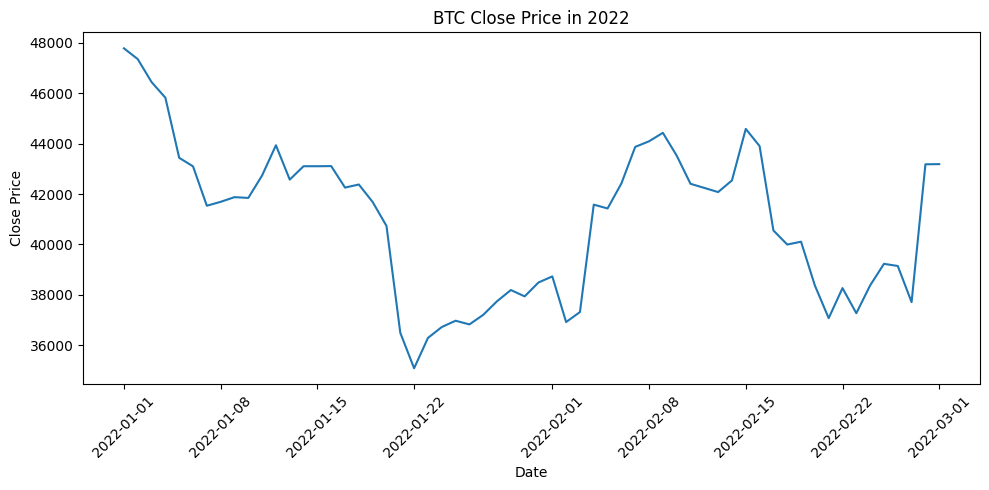

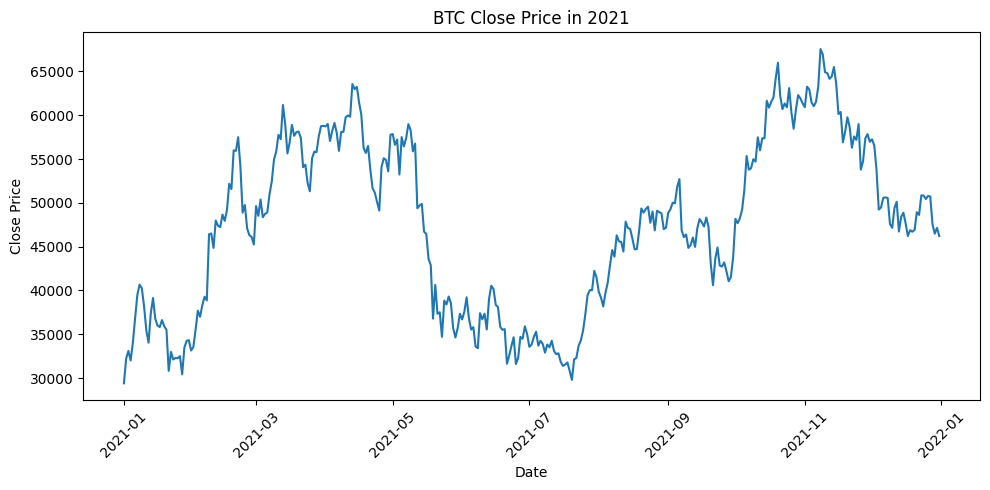

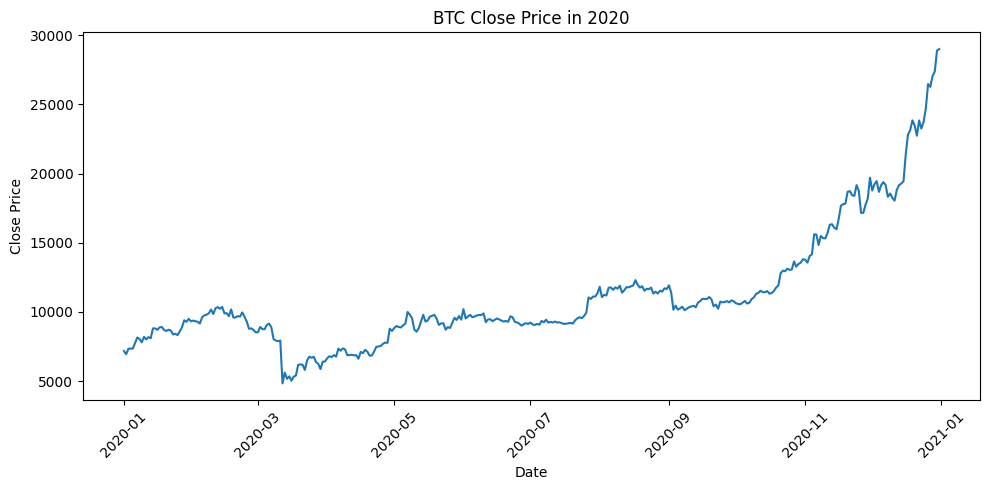

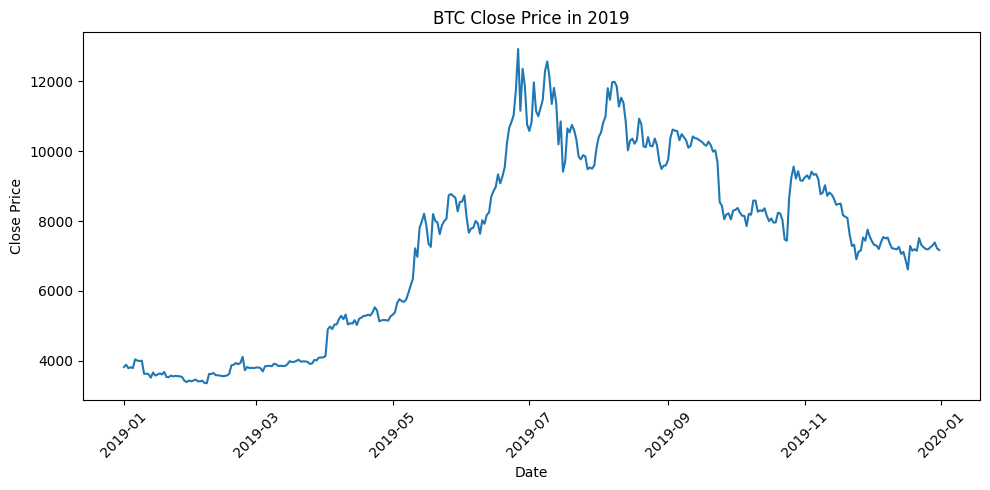

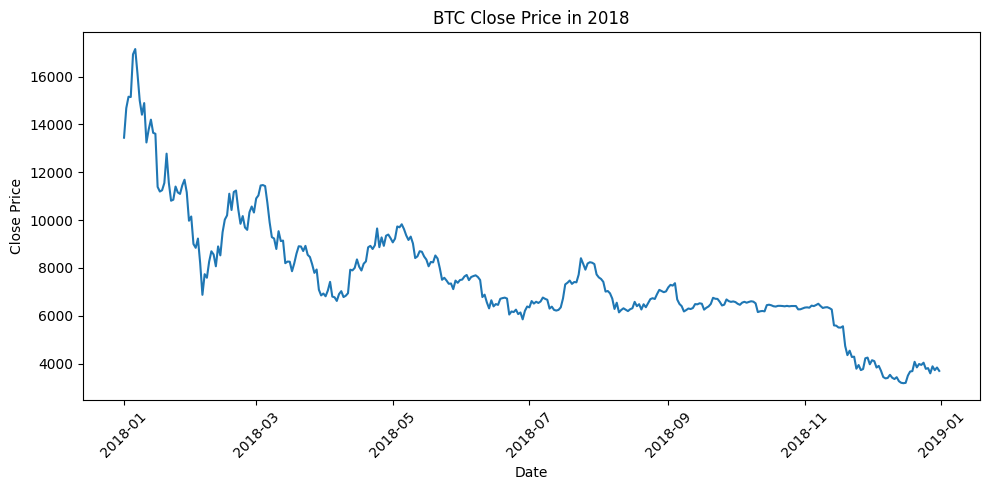

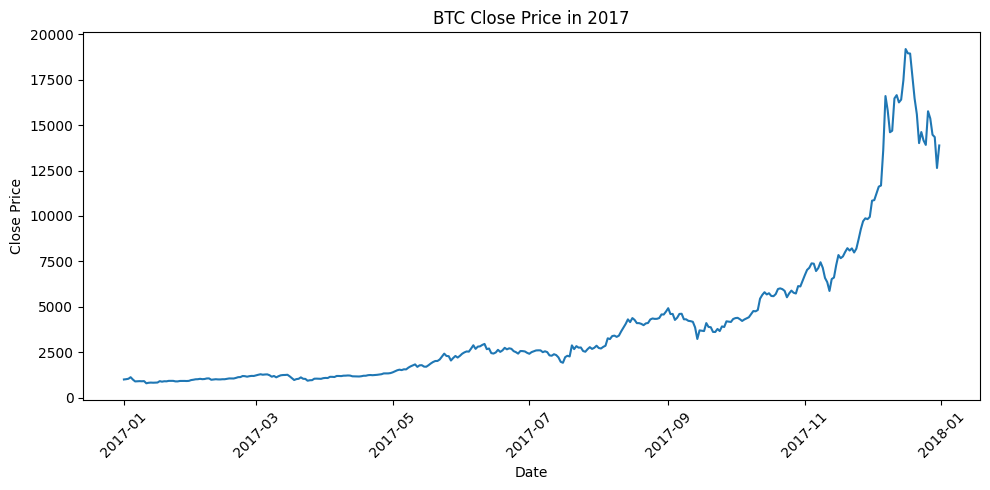

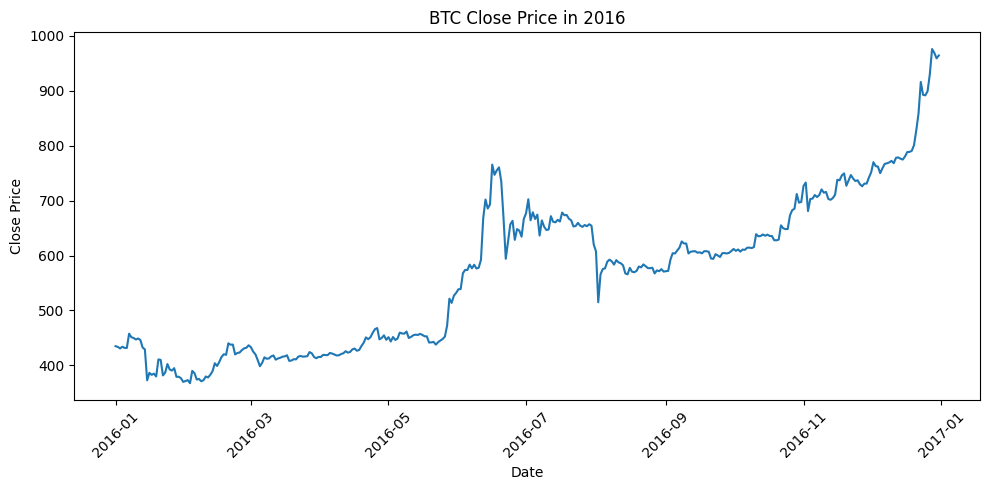

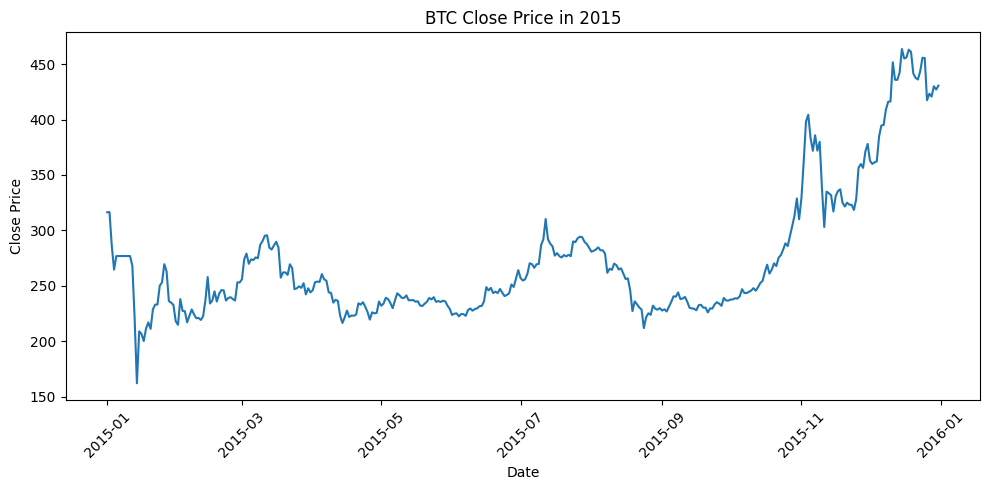

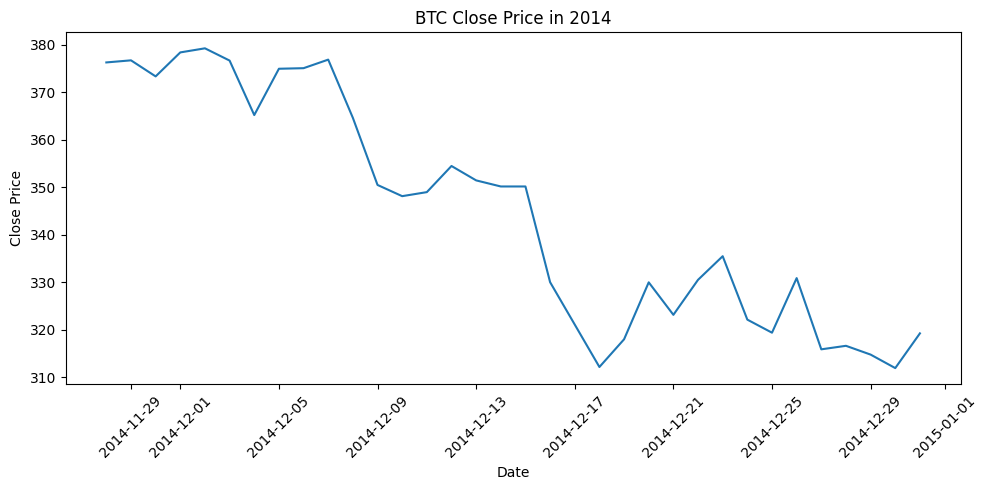

In [6]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

unique_years = df['year'].unique()
for year in unique_years:
    dates = pd.date_range(start=str(year) + '-01-01', end=str(year) + '-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day
    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
    
    #plot
    plt.figure(figsize=(10, 5))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title('BTC Close Price in ' + str(year))
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
!pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   -------------------------------------- - 71.7/75.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00


In [7]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

C:\Users\likef\AppData\Local\Temp\ipykernel_23144\2444928579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


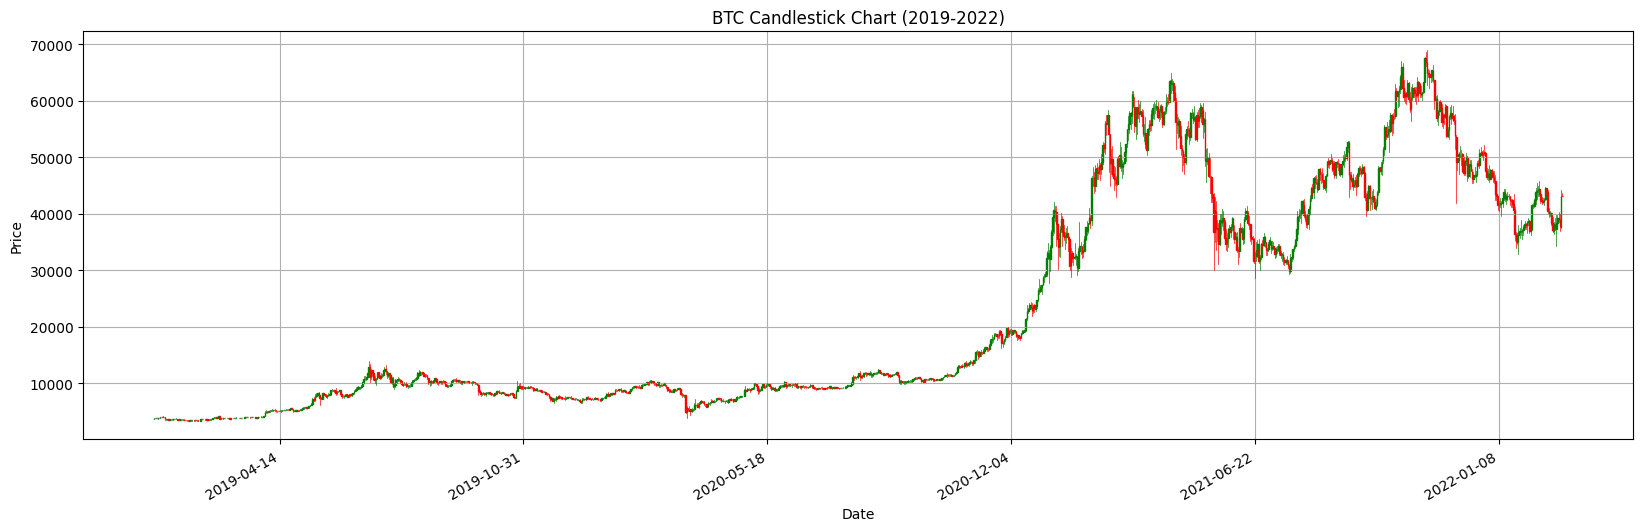

In [8]:
df_filtered = df[(df['date'] >= "2019-01-01") & (df['date'] <= "2022-12-31")]

df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

fig, ax = plt.subplots(figsize=(20, 6))
candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('BTC Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [9]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
year          0
month         0
day           0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

In [11]:
df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [17]:
X

,Standardized_Open_Prices,Standardized_High_Prices,Standardized_Low_Prices
0,1.937893,1.887415,2.029161
1,1.599553,1.925034,1.665409
2,1.687421,1.663971,1.636567
3,1.693320,1.690505,1.737377
4,1.639126,1.654474,1.700955
...,...,...,...
2646,-0.695461,-0.696442,-0.694946
2647,-0.695584,-0.696475,-0.695086
2648,-0.695573,-0.696494,-0.695068
2649,-0.695583,-0.696218,-0.695136


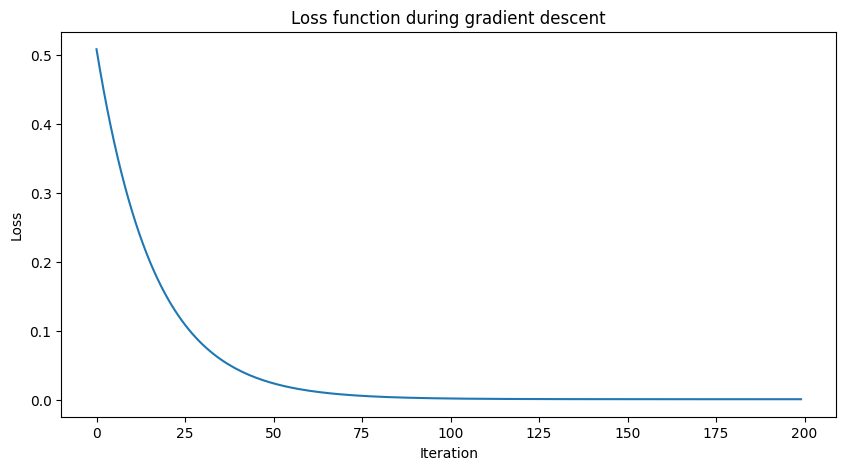

In [18]:
def predict(X, w, b):
    return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat-y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw,db, cost)

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(num_iterations):
        y_hat = predict(X, w, b) 
        dw, db, cost = gradient(y_hat, y, X) 
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)


    return w, b, losses

    
w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Loss function during gradient descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [19]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


C:\Users\likef\AppData\Local\Temp\ipykernel_23144\3843425141.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['predicted_close'] = df_2015['close'].shift(1)


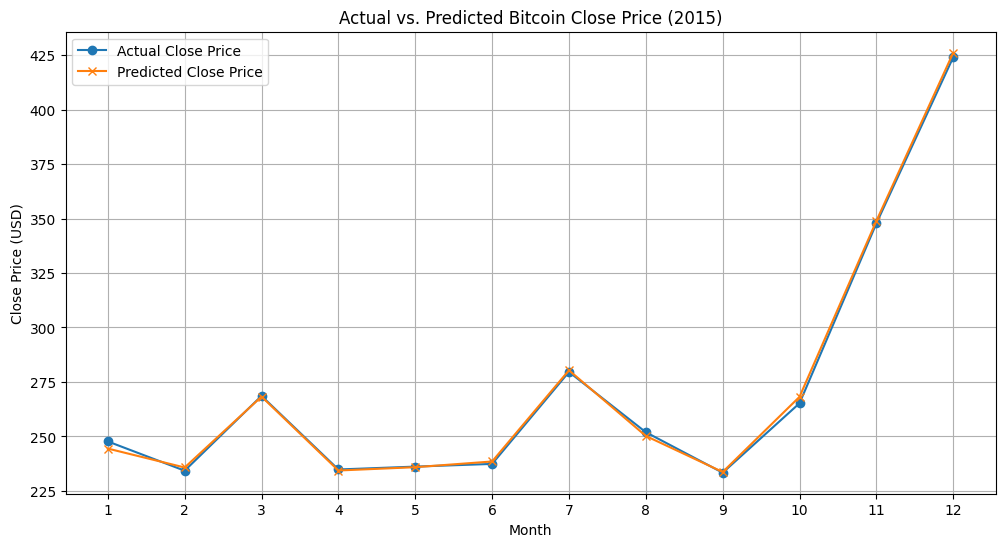

In [20]:
# Filter data for 2015
df_2015 = df[df['date'].dt.year == 2015]

# Group by month and get the mean of the actual and predicted close prices
monthly_actual = df_2015.groupby(df_2015['date'].dt.month)['close'].mean()

# Assuming you have a way to predict the close prices for 2015 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2015['predicted_close'] = df_2015['close'].shift(1)
monthly_predicted = df_2015.groupby(df_2015['date'].dt.month)['predicted_close'].mean()


# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_actual.index, monthly_actual.values, label='Actual Close Price', marker='o')
plt.plot(monthly_predicted.index, monthly_predicted.values, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (2015)')
plt.xlabel('Month')
plt.ylabel('Close Price (USD)')
plt.xticks(monthly_actual.index)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\likef\AppData\Local\Temp\ipykernel_23144\655946329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)


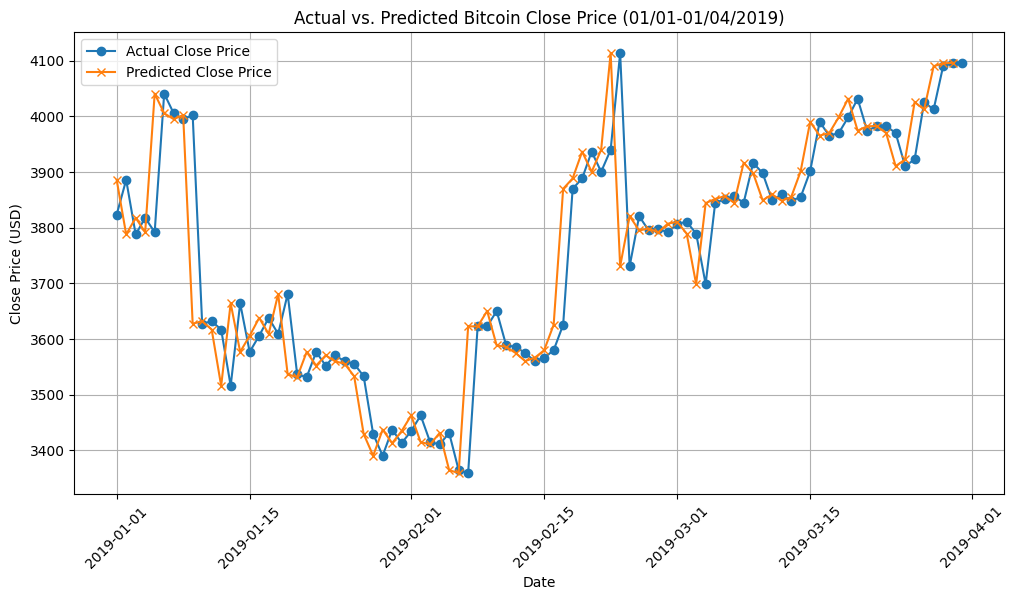

In [21]:
# Filter data for 2019-01-01 to 2019-03-31
df_2019_Q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]

# Assuming you have a way to predict the close prices for 2019-01-01 to 2019-03-31 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_Q1['date'], df_2019_Q1['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_Q1['date'], df_2019_Q1['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01-01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()